In [1]:
# To-utvalgs permutasjonstest

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

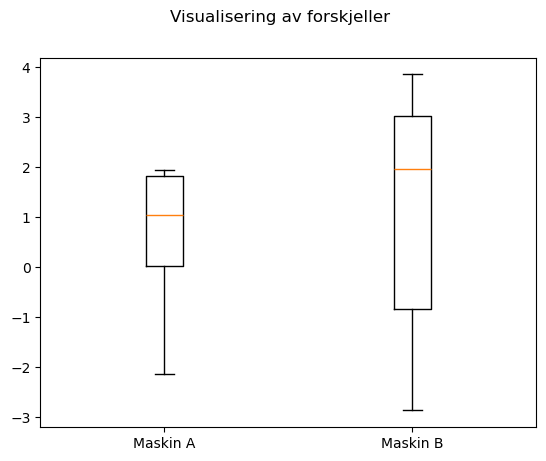

In [21]:
# Lag to dataset
np.random.seed(234)
xData = stats.norm.rvs(loc = 1, scale = 1, size = 9)
yData = stats.norm.rvs(loc = 1, scale = 2, size = 7)

# Plott
fig, axs = plt.subplots(1,1)
fig.suptitle('Visualisering av forskjeller')
Data = [xData, yData]
hmm = axs.boxplot(Data, tick_labels = ["Maskin A", "Maskin B"])

p-verdi (95% CI): 0.032±0.002


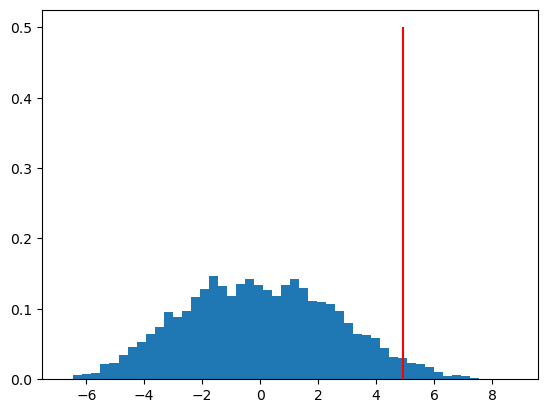

In [22]:
# Observert verdi
u = np.var(yData, ddof=1)-np.var(xData, ddof=1)

# Visualiser og regn ut p-verdi
xAll = np.concatenate((xData,yData))
B = 50000
uSample = np.zeros(B)
for b in range(B):
    np.random.shuffle(xAll)
    xAnew = xAll[1:9]
    xBnew = xAll[10:16]
    uSample[b] = np.var(xBnew, ddof=1)-np.var(xAnew, ddof=1)

# Plot
h = plt.hist(uSample, 50, density = True)
plt.vlines([u], 0, 0.5, 'r')

# Estimer p-verdi
uSample[1] = u
pHat = np.mean(uSample>=u)
print("p-verdi (95% CI): ", round(pHat,3), "±", round(1.960*np.sqrt(pHat*(1-pHat)/B), 3), sep = "")